In [1]:
import sys
sys.path.append('..')

# standard python imports
import numpy as np
import matplotlib.pyplot as plt

# tidy3D import
import tidy3d as td
from pepper import SimulationFdfd
from pepper import GaussianBeamFdfd

[13:57:15] INFO     Using client version: 1.9.1                                                     ]8;id=810973;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/__init__.py\__init__.py]8;;\:]8;id=523841;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/__init__.py#115\115]8;;\

In [2]:
x_span = 10.
y_span = 10.

In [3]:
wl = 1.55

In [4]:
n_bg = 1.0
background = td.Medium(permittivity=n_bg**2)

In [5]:
# wavelength range of interest
lambda_beg = 1.0
lambda_end = 2.0

# define pulse parameters
freq_beg = td.C_0 / lambda_end
freq_end = td.C_0 / lambda_beg
freq0 = (freq_beg + freq_end) / 2
fwidth = (freq_end - freq0) / 1.5

min_steps_per_wvl = 30
run_time = 1e-11


source = td.GaussianBeam(
    size=[0, y_span / 4, td.inf],
    center=[x_span/5, 0, 0],
    direction='+',
    source_time=td.GaussianPulse(freq0=freq0, fwidth=fwidth),
)

<Axes: title={'center': 'cross section at z=0.00'}, xlabel='x', ylabel='y'>

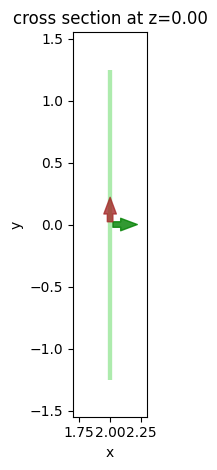

In [6]:
source.plot(z=0)

In [7]:
gaussian_beam = GaussianBeamFdfd(
    size=[0, y_span/4, td.inf],
    center=[x_span/5, 0, 0],
    direction='+',
    sim_wl=2.0 * 1e-6
)

In [8]:
gaussian_beam

GaussianBeam(type='GaussianBeam', center=(2.0, 0.0, 0.0), size=(0.0, 2.5, inf), source_time=DummySource(amplitude=1.0, phase=0.0, type='DummySource', freq0=149896229065498.03, fwidth=14989622906549.805, offset=5.0), name=None, num_freqs=1, direction='+', angle_theta=0.0, angle_phi=0.0, pol_angle=0.0, waist_radius=1.0, waist_distance=0.0, sim_freq=149896229065498.03, sim_wl=2e-06, simulation_type=<SimulationType.FDFD: 'fdfd'>)

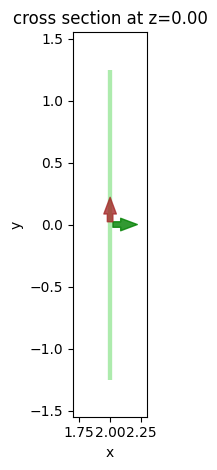

In [9]:
gaussian_beam.plot(z=0);

[13:57:16] WARNING  'Simulation.boundary_spec' uses default value, which is 'Periodic()' on all   ]8;id=39386;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/components/simulation.py\simulation.py]8;;\:]8;id=624070;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/components/simulation.py#232\232]8;;\
                    sides but will change to 'PML()' in Tidy3D version 2.0. We recommend                           
                    explicitly setting all boundary conditions ahead of this release to avoid                      
                    unexpected results.                                                                            

           INFO     Auto meshing using wavelength 2.0000 defined from sources.                     ]8;id=840056;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/components/grid/grid_spec.py\grid_spec.py]8;;\:]8;id=260458;file:///Users/lucasgrosjean/.pyenv/versions/3.11.2/envs/pepper/lib/python3.11/site-packages/tidy3d/components/grid/grid_spec.py#510\510]8;;\

<Axes: title={'center': 'cross section at z=0.01'}, xlabel='x', ylabel='y'>

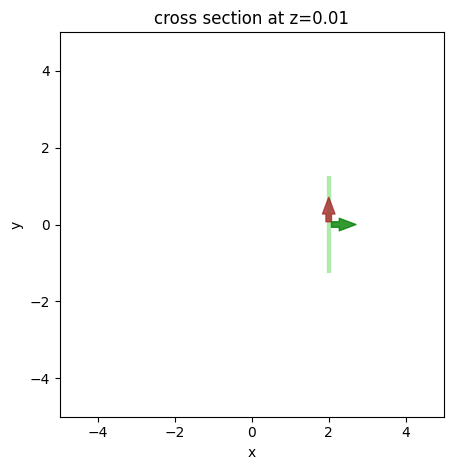

In [10]:
sim = SimulationFdfd(
    size=[x_span, y_span, 0.1],
    sources=[gaussian_beam],
    polarization='TE',
    wavelength=3*1e-6
)

sim.plot(z=0.01)

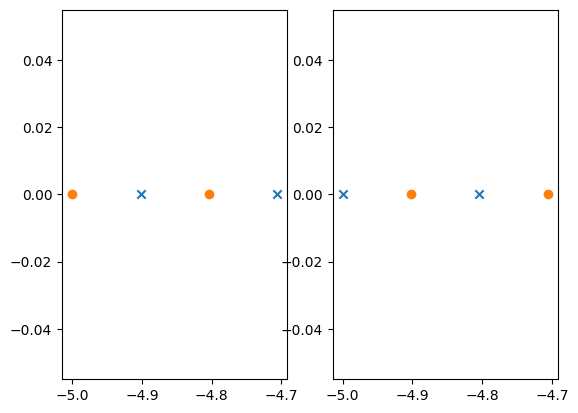

In [11]:
Ex_x = sim.grid.yee.E.x.x[0:2]
Ex_y = sim.grid.yee.E.x.y[0:2]

Ey_x = sim.grid.yee.E.y.x[0:2]
Ey_y = sim.grid.yee.E.y.y[0:2]

fig, ax = plt.subplots(1,2)
ax[0].scatter(Ex_x, y=[0] * len(Ex_x), label=r'E_x_x', marker='x')
ax[0].scatter(Ey_x, y=[0] * len(Ey_x), label=r'E_y_x')

ax[1].scatter(Ex_y, y=[0] * len(Ex_y), label=r'E_x_y', marker='x')
ax[1].scatter(Ey_y, y=[0] * len(Ey_y), label=r'E_y_y')

plt.show()

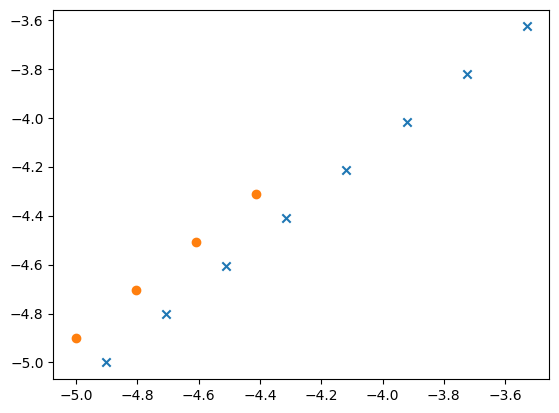

In [12]:
Ex_x = sim.grid.yee.E.x.x[0:8]
Ex_y = sim.grid.yee.E.x.y[0:8]

Ey_x = sim.grid.yee.E.y.x[0:4]
Ey_y = sim.grid.yee.E.y.y[0:4]

fig, ax = plt.subplots(1)
ax.scatter(Ex_x, Ex_y, label=r'E_x', marker='x')
ax.scatter(Ey_x, Ey_y, label=r'E_y', marker='o')

plt.show()

(1.9, 2)

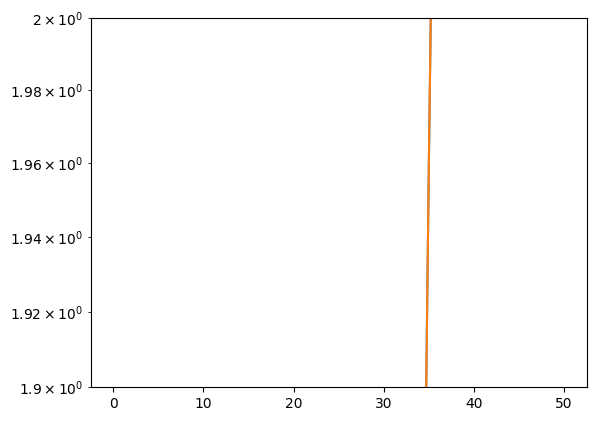

In [13]:
plt.semilogy(sim.grid.yee.E.x.x);
plt.semilogy(sim.grid.yee.E.y.y);
plt.ylim([1.9,2])

In [14]:
sim.grid.yee.E.x

Coords(x=(-4.901960784313726, -4.705882352941176, -4.509803921568627, -4.313725490196079, -4.117647058823529, -3.9215686274509802, -3.7254901960784315, -3.5294117647058822, -3.3333333333333335, -3.1372549019607843, -2.9411764705882355, -2.7450980392156863, -2.549019607843137, -2.352941176470588, -2.1568627450980387, -1.9607843137254894, -1.7647058823529402, -1.568627450980391, -1.3725490196078418, -1.1764705882352926, -0.9803921568627436, -0.7843137254901946, -0.5882352941176454, -0.3921568627450962, -0.196078431372547, 2.220446049250313e-15, 0.19607843137255143, 0.39215686274510064, 0.5882352941176499, 0.7843137254901991, 0.9803921568627483, 1.1764705882352975, 1.3725490196078467, 1.568627450980396, 1.7647058823529451, 1.9607843137254943, 2.1568627450980435, 2.3529411764705928, 2.549019607843142, 2.745098039215691, 2.9411764705882404, 3.137254901960789, 3.3333333333333375, 3.529411764705886, 3.725490196078434, 3.9215686274509824, 4.117647058823531, 4.313725490196079, 4.509803921568627

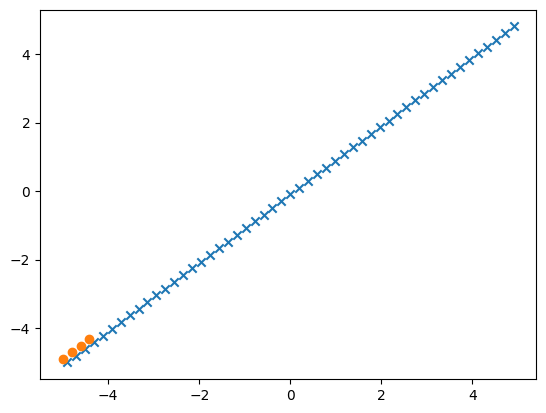

In [15]:
Ex_x = sim.grid.yee.E.x.x
Ex_y = sim.grid.yee.E.x.y

Ey_x = sim.grid.yee.E.y.x[0:4]
Ey_y = sim.grid.yee.E.y.y[0:4]

fig, ax = plt.subplots(1)
ax.scatter(Ex_x, Ex_y, label=r'E_x', marker='x')
ax.scatter(Ey_x, Ey_y, label=r'E_y', marker='o')

plt.show()

In [16]:
print(sim.grid.yee.E.x.x[0:2])
print(sim.grid.yee.E.x.y[0:2])
print(sim.grid.yee.E.x.z[0:2])

(-4.901960784313726, -4.705882352941176)
(-5.0, -4.803921568627451)
(-0.09999999995630442,)


In [17]:
print(sim.grid.yee.E.y.x[0:2])
print(sim.grid.yee.E.y.y[0:2])
print(sim.grid.yee.E.y.z[0:2])

(-5.0, -4.803921568627451)
(-4.901960784313726, -4.705882352941176)
(-0.09999999995630442,)


In [18]:
print(sim.grid.yee.E.z.x[0:2])
print(sim.grid.yee.E.z.y[0:2])
print(sim.grid.yee.E.z.z[0:2])

(-5.0, -4.803921568627451)
(-5.0, -4.803921568627451)
(0.0,)


In [19]:
print(sim.grid.yee.H.x.x[0:2])
print(sim.grid.yee.H.x.y[0:2])
print(sim.grid.yee.H.x.z[0:2])

(-5.0, -4.803921568627451)
(-4.901960784313726, -4.705882352941176)
(0.0,)


In [20]:
print(sim.grid.yee.H.y.x[0:2])
print(sim.grid.yee.H.y.y[0:2])
print(sim.grid.yee.H.y.z[0:2])

(-4.901960784313726, -4.705882352941176)
(-5.0, -4.803921568627451)
(0.0,)


In [21]:
print(sim.grid.yee.H.z.x[0:2])
print(sim.grid.yee.H.z.y[0:2])
print(sim.grid.yee.H.z.z[0:2])

(-4.901960784313726, -4.705882352941176)
(-4.901960784313726, -4.705882352941176)
(-0.09999999995630442,)


In [22]:
print(sim.grid.yee.E.z.x[-1])
print(sim.grid.yee.E.z.y[-1])
print(sim.grid.yee.H.z.x[-1])
print(sim.grid.yee.H.z.y[-1])

4.80392156862745
4.80392156862745
4.901960784313725
4.901960784313725
